In [ ]:
!pip install easyocr opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 16.7 MB/s eta 0:00:00


In [ ]:
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
from PIL import Image
import requests
import easyocr
import re

In [ ]:
!mkdir pan_card_detector
!mkdir pan_card_detector/image

In [ ]:
original = Image.open(requests.get('https://5.imimg.com/data5/AN/EO/NC/ANDROID-33737889/product-jpeg-500x500.jpeg', stream=True).raw)
fake = Image.open(requests.get('https://editor.analyticsvidhya.com/uploads/83117tampered.png', stream=True).raw)

In [ ]:
print("Original image format : ",original.format)
print("Fake image format : ",fake.format)
print("Original image size : ",original.size)
print("Fake image size : ",fake.size)

Original image format :  JPEG
Fake image format :  PNG
Original image size :  (500, 323)
Fake image size :  (250, 160)


In [ ]:
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_detector/image/original.png')
fake = fake.resize((250,160))
print(fake.size)
fake.save('pan_card_detector/image/fake.png')

(250, 160)
(250, 160)


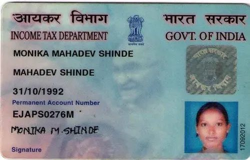

In [ ]:
original

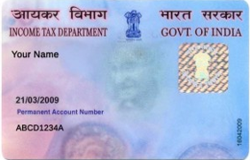

In [ ]:
fake

In [ ]:
original = cv2.imread('pan_card_detector/image/original.png')
fake = cv2.imread('pan_card_detector/image/fake.png')


In [ ]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
fake_gray = cv2.cvtColor(fake, cv2.COLOR_BGR2GRAY)

In [ ]:
(score, diff) = structural_similarity(original_gray, fake_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {} %".format(score*100))

SSIM: 36.77575276249644 %


In [ ]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(fake, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


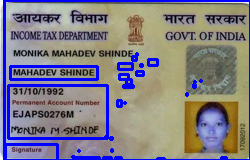

In [ ]:
print('Original Format Image')
Image.fromarray(original)

Fake Image


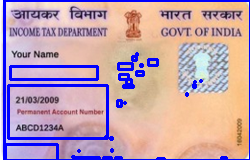

In [ ]:
print('Fake Image')
Image.fromarray(fake)

Different Image


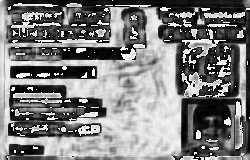

In [ ]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


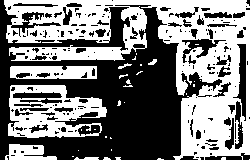

In [ ]:
print('Threshold Image')
Image.fromarray(thresh)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

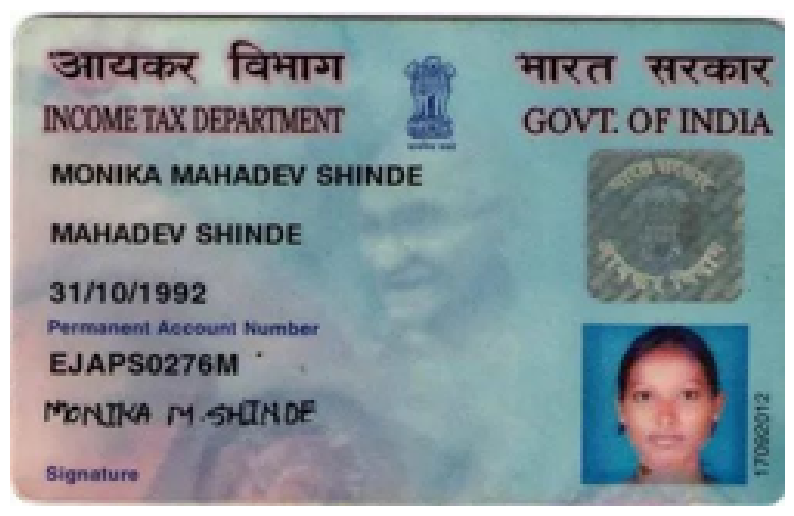

Detected Text: 31rr | Confidence: 0.10
Detected Text: fatrT | Confidence: 0.25
Detected Text: ART | Confidence: 0.37
Detected Text: TarR | Confidence: 0.07
Detected Text: INCOME TAX DEPARTMENT | Confidence: 0.45
Detected Text: GOVT OF INDIA | Confidence: 0.99
Detected Text: HonK | Confidence: 0.10
Detected Text: MAHadev SHinde | Confidence: 0.23
Detected Text: MAHADEV SHINDE | Confidence: 0.61
Detected Text: 31/10/1992 | Confidence: 0.74
Detected Text: EJAPS027GM | Confidence: 0.46
Detected Text: FENIKA | Confidence: 0.38
Detected Text: 'ShinDE | Confidence: 0.06
Detected Text: Jutalute | Confidence: 0.05


In [ ]:
# Initialize the easyocr Reader object
reader = easyocr.Reader(['en'])  # Specify languages, e.g., ['en'] for English

# Load the image
image_path = '/content/pan_card_detector/image/original.png'  # Replace with your image path

# Perform OCR on the image
result = reader.readtext(image_path)

# Display the image using OpenCV and Matplotlib
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
# Print the extracted text
extracted_text = ""
for detection in result:
    # Each detection is a tuple of (bounding_box, text, confidence)
    bounding_box, text, confidence = detection
    extracted_text += text + " "
    print(f"Detected Text: {text} | Confidence: {confidence:.2f}")

In [ ]:
print("Full Extracted Text:\n", extracted_text)

Full Extracted Text:
 31rr fatrT ART TarR INCOME TAX DEPARTMENT GOVT OF INDIA HonK MAHadev SHinde MAHADEV SHINDE 31/10/1992 EJAPS027GM FENIKA 'ShinDE Jutalute 


Detected PAN Card Number: EJAPS027G


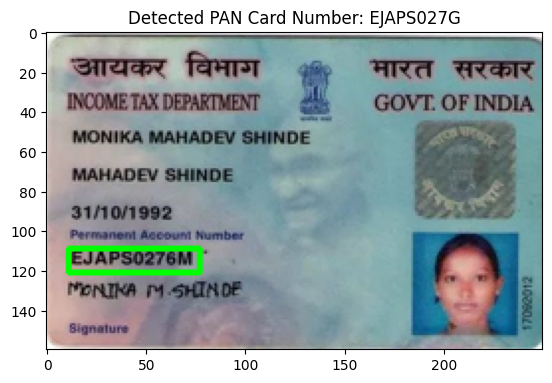

In [ ]:


# Initialize the OCR reader from easyocr (supports multiple languages including English)
reader = easyocr.Reader(['en'])

# PAN card number regex format: [A-Z]{3,5}[0-9]{3,4}[A-Z]{1,2}
pan_regex = re.compile(r'[A-Z]{3,5}[0-9]{3,4}[A-Z]{1,2}')

# Function to detect and extract PAN card number from image
def detect_pan_card_number(image_path):
    image = cv2.imread(image_path)
    results = reader.readtext(image, detail=1)  # Get bounding boxes with details

    for (bbox, text, prob) in results:
        # Apply regex to check if the detected text matches the PAN card number format
        if re.fullmatch(pan_regex, text):
            # Draw bounding box around the detected PAN card number
            top_left = tuple([int(val) for val in bbox[0]])
            bottom_right = tuple([int(val) for val in bbox[2]])
            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

            # Print the detected PAN card number
            print(f"Detected PAN Card Number: {text}")

            # Plot the image with bounding box
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(f"Detected PAN Card Number: {text}")
            plt.show()

# Detect PAN card number from both images (original and fake)
detect_pan_card_number('pan_card_detector/image/original.png')
detect_pan_card_number('pan_card_detector/image/fake.png')


In [ ]:
print("Checking Pancard Number from the Extracted Text.......")
for detection in result:
    bounding_box, text, confidence = detection
    text = text.replace(" ", "").upper()
    match = re.search(r'[A-Z]{3,5}[0-9]{3,4}[A-Z]{1,2}', text)
    if match:
        print('Status: Pancard detected')
        break
else:
    print('Status: Pancard not detected')

print('Pancard Number:',text)

Checking Pancard Number from the Extracted Text.......
Status: Pancard detected
Pancard Number: EJAPS027GM


R-CNN

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 89.2MB/s]


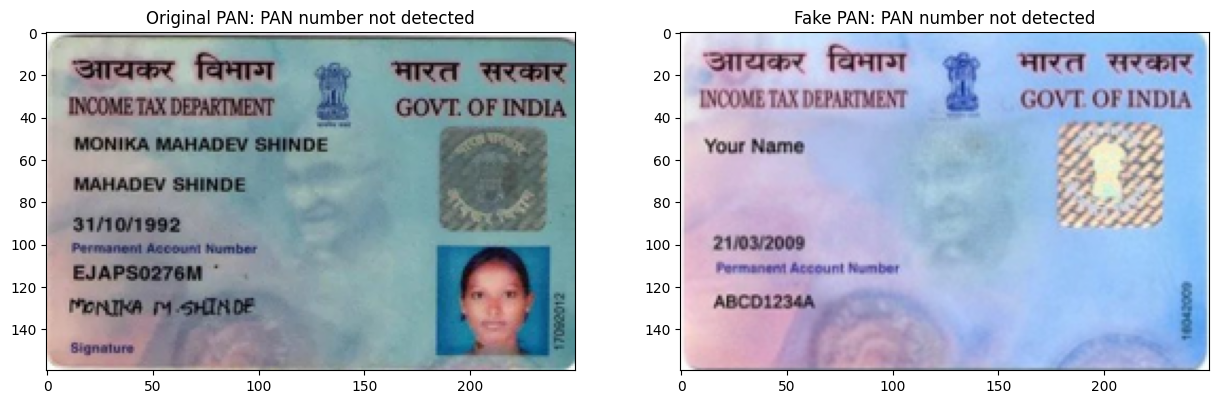


Results:


Original PAN card number not detected.


Original PAN card number not detected.
Original PAN card number not detected.


In [ ]:
import cv2
import torch
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import re
from torchvision import models, transforms
from PIL import Image
from matplotlib.patches import Rectangle

# Define regex for PAN card number
pan_card_pattern = re.compile(r'[A-Z]{3,5}[0-9]{3,4}[A-Z]{1,2}')

# Load pretrained Faster R-CNN model from torchvision
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define transformation for input image to model
transform = transforms.Compose([
    transforms.ToTensor()
])

# Function to convert image to RGB and get ROI of PAN card
def get_roi(image):
    # Ensure image is in RGB format
    if image.mode != 'RGB':
        image = image.convert('RGB')

    img_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        predictions = model(img_tensor)

    boxes = predictions[0]['boxes']
    scores = predictions[0]['scores']

    # Filter out low-confidence detections
    threshold = 0.5
    valid_boxes = []
    for i, score in enumerate(scores):
        if score > threshold:
            valid_boxes.append(boxes[i].numpy().astype(int))

    return valid_boxes

# Function to extract PAN number using OCR and validate it
def extract_and_validate_pan(roi):
    reader = easyocr.Reader(['en'], gpu=False)  # Disable GPU if not available
    result = reader.readtext(np.array(roi))

    pan_number = None
    for (bbox, text, prob) in result:
        if re.fullmatch(pan_card_pattern, text):
            pan_number = text
            break

    return pan_number

# Load the images
original_img = Image.open('pan_card_detector/image/original.png')
fake_img = Image.open('pan_card_detector/image/fake.png')

# Get ROIs from both images
original_boxes = get_roi(original_img)
fake_boxes = get_roi(fake_img)

# Function to plot images and highlight PAN card number
def plot_image_with_pan(image, boxes, title, ax):
    ax.imshow(image)
    pan_number_detected = False

    for box in boxes:
        # Crop the detected region
        roi = image.crop((box[0], box[1], box[2], box[3]))

        # Extract PAN number
        pan_number = extract_and_validate_pan(roi)

        # If a valid PAN number is found, highlight the box and display the number
        if pan_number:
            ax.add_patch(Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='r', facecolor='none'))
            ax.set_title(f"{title}: {pan_number}")
            pan_number_detected = True
            break

    if not pan_number_detected:
        ax.set_title(f"{title}: PAN number not detected")

# Create subplots to display the original and fake images
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot original image with detected PAN card number
plot_image_with_pan(original_img, original_boxes, 'Original PAN', axs[0])

# Plot fake image with detected PAN card number
plot_image_with_pan(fake_img, fake_boxes, 'Fake PAN', axs[1])

plt.show()

# Print results
print("\nResults:")
for img_title, boxes, image in [('Original', original_boxes, original_img), ('Fake', fake_boxes, fake_img)]:
    for box in boxes:
        roi = image.crop((box[0], box[1], box[2], box[3]))
        pan_number = extract_and_validate_pan(roi)
        if pan_number:
            print(f"{img_title} PAN card number detected: {pan_number}")
        else:
            print(f"{img_title} PAN card number not detected.")
